# New Section

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Tweets.csv to Tweets.csv


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [3]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv('Tweets.csv')
print(df.shape)

(27481, 4)


In [4]:
df.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from tqdm import tqdm
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, \
roc_auc_score, roc_curve, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset
df = pd.read_csv('Tweets.csv')
#Let's check the samples of data
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
# Let's drop selected_text & text ID column
df.drop(['selected_text', 'textID'], axis=1, inplace=True)
target = 'sentiment'
df.reset_index(drop=True, inplace=True)  # Resetting the index
original_df = df.copy(deep=True)

# Check the dimensions of the dataset
print('Dimensions of dataset:', df.shape)
df.info()  # Checking the dtypes of all the columns
df.describe()  # Descriptive summary of dataset

Dimensions of dataset: (27481, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


,text,sentiment
count,27480,27481
unique,27480,3
top,All this flirting going on - The ATG smiles...,neutral
freq,1,11118


In [8]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [9]:
# Checking for Null values
df.isnull().sum()

# Dropping the null values
df.dropna(inplace=True)
original_df = df.copy()

# Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Let's get a word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

# Number of Characters (including spaces)
df['char_count'] = df['text'].str.len()

# Average Word Length
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words) / len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))

# Number of Stop Words
nltk.download('stopwords')
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))


# Number of hashtags
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))

# Number of numerics
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


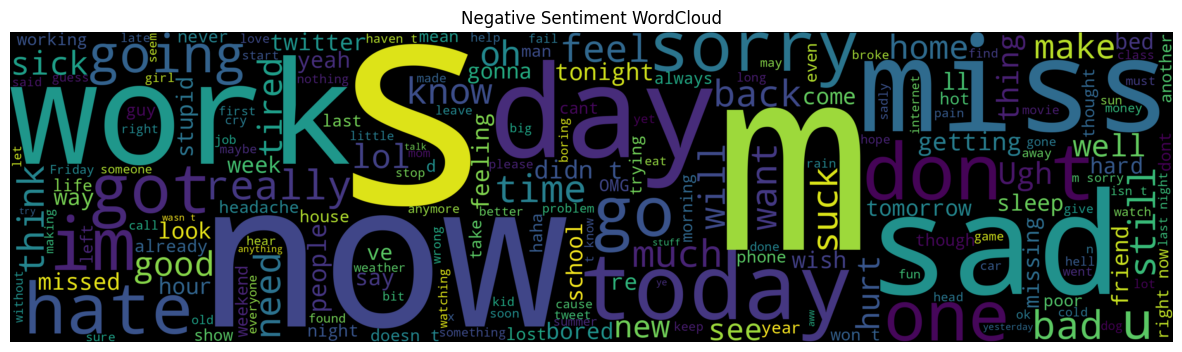

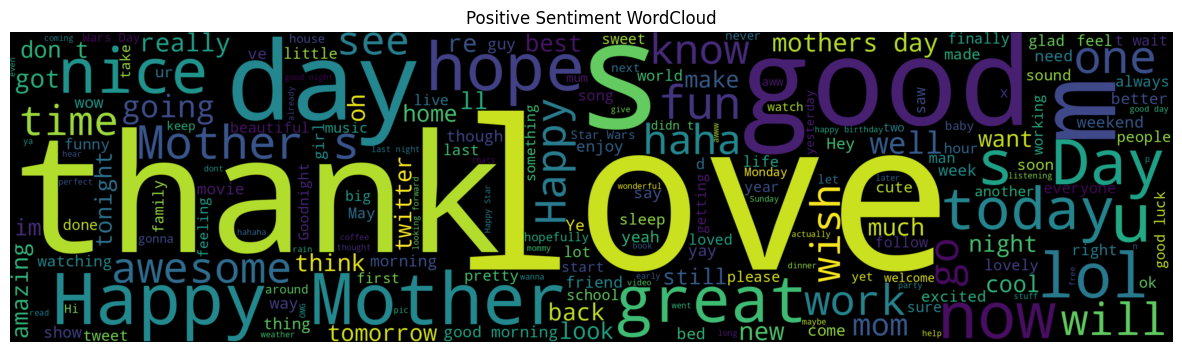

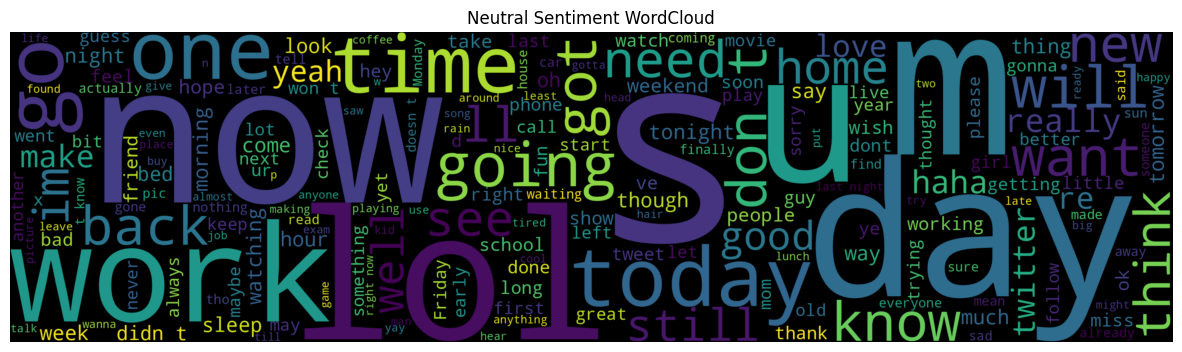

In [11]:
# Install WordCloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# Split the dataframe by sentiment
negative_df = df[df['sentiment'] == 'negative']
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']
# Define a function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['text'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and word != 'RT' ])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                          width=3000, height=800).generate(cleaned_word)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and display WordClouds for each sentiment category
generate_wordcloud(negative_df, 'Negative Sentiment WordCloud')
generate_wordcloud(positive_df, 'Positive Sentiment WordCloud')
generate_wordcloud(neutral_df, 'Neutral Sentiment WordCloud')


In [12]:
# Convert text to lowercase
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removal of punctuations
df['text'] = df['text'].str.replace('[^\w\s]', '')

# Removal of stop words
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df.head()

,text,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics
0,"i`d responded, going",neutral,8,36,4.142857,3,0,0
1,sooo sad miss san diego!!!,negative,11,46,3.600000,4,0,0
2,boss bullying me...,negative,5,25,4.200000,2,0,0
3,interview! leave alone,negative,6,31,5.200000,2,0,0
4,"sons ****, couldn`t put releases already bought",negative,15,75,4.357143,7,0,0


8. Frequency Removal & Stemming


In [13]:
# Rare Words Removal
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:30]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

# Rare words frequency
freq = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
freq

# Stemming
st = PorterStemmer()
df['text'] = df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head()

,text,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics
0,"i`d responded,",neutral,8,36,4.142857,3,0,0
1,sooo sad miss san diego!!!,negative,11,46,3.600000,4,0,0
2,boss bulli me...,negative,5,25,4.200000,2,0,0
3,interview! leav alon,negative,6,31,5.200000,2,0,0
4,"son ****, couldn`t put releas alreadi bought",negative,15,75,4.357143,7,0,0


# 9. Sentiment Distribution Visualization 📉

                 Sentiment Variable Distribution                  


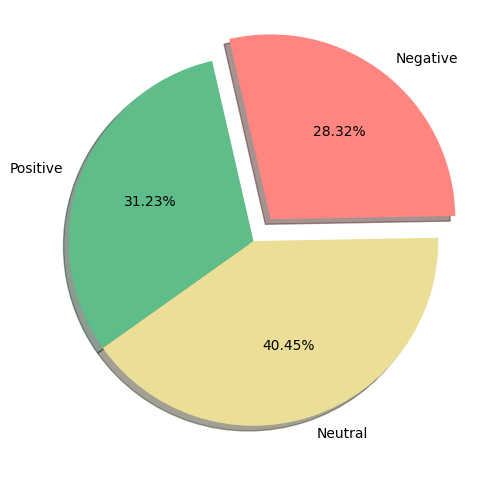

In [14]:
# Let's look at the overall distribution of positive, negative and neutral sentiments
print('\033[1mSentiment Variable Distribution'.center(70))
plt.figure(figsize=(12, 6))
colors = ['#ebde96', '#5ebd89', '#ff8680']
plt.pie(df[target].value_counts(), labels=['Neutral', 'Positive', 'Negative'], counterclock=False, shadow=True,
        explode=[0, 0, 0.15], autopct='%1.2f%%', radius=1, startangle=1, colors=colors)

plt.show()

# 10. Word Frequency Distribution 📈

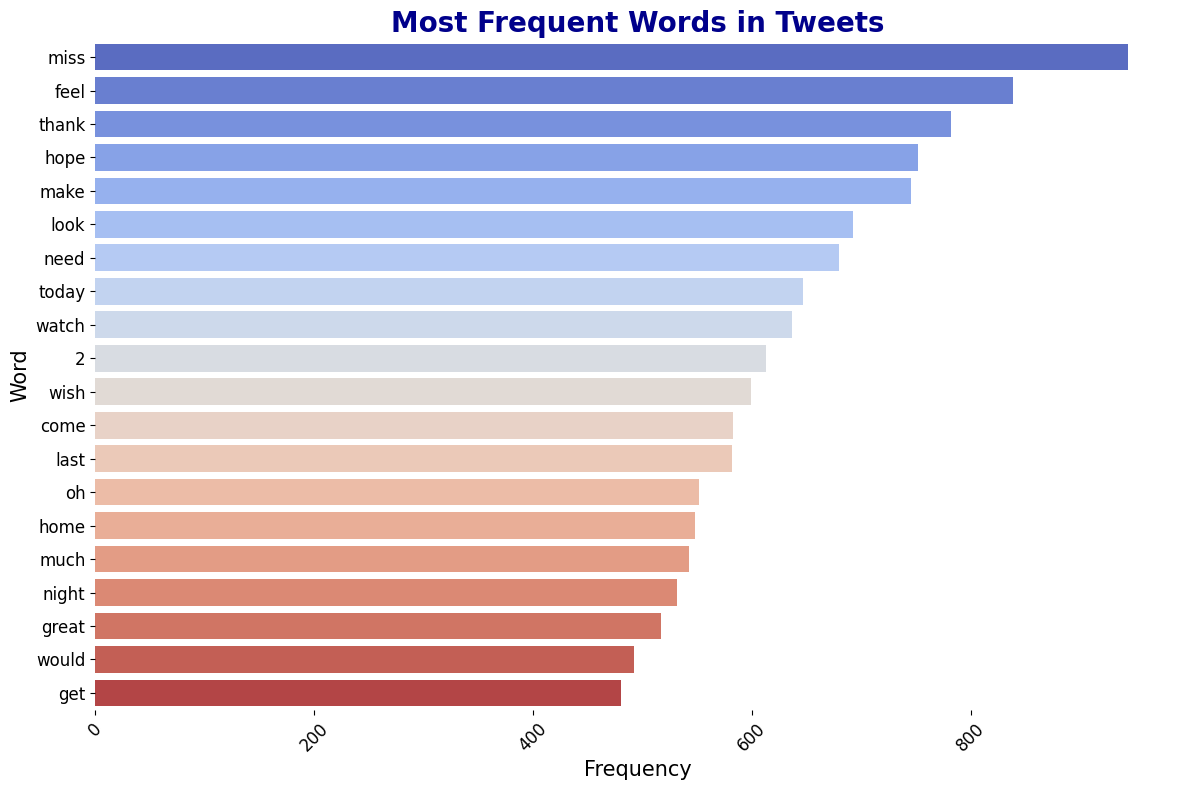

In [15]:
# Frequency Distribution of Words
from collections import Counter

# Get the list of all words
words = ' '.join(df['text']).split()

# Count frequency of each word
word_counts = Counter(words)

# Get the most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Frequency Distribution of Words with Beautiful Styling
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='coolwarm')
plt.title('Most Frequent Words in Tweets', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Frequency', fontsize=15, fontweight='light')
plt.ylabel('Word', fontsize=15, fontweight='light')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# 1. Text Length Distribution 📏

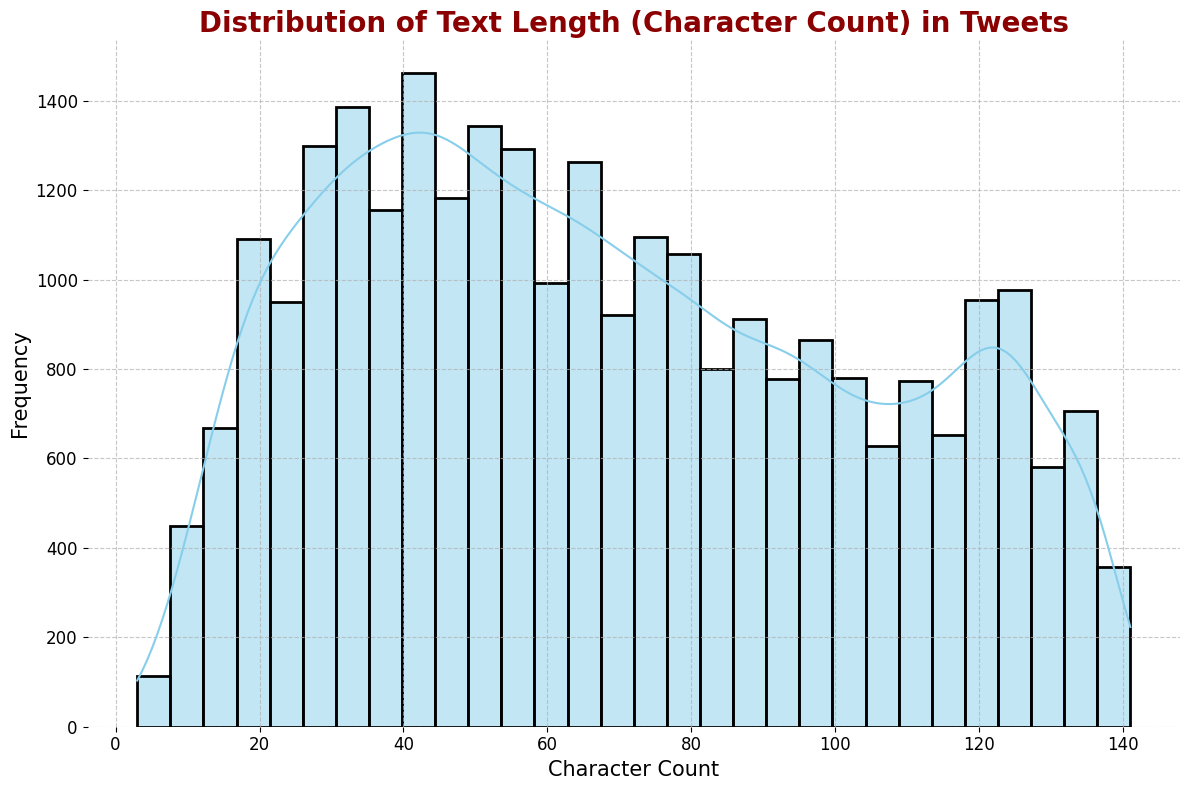

In [16]:
# Plotting Text Length Distribution with Enhanced Styling
plt.figure(figsize=(12, 8))
sns.histplot(df['char_count'], kde=True, color='skyblue', bins=30, linewidth=2, edgecolor='black')
plt.title('Distribution of Text Length (Character Count) in Tweets', fontsize=20, fontweight='bold', color='darkred')
plt.xlabel('Character Count', fontsize=15, fontweight='light')
plt.ylabel('Frequency', fontsize=15, fontweight='light')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Word Count Distribution 📝

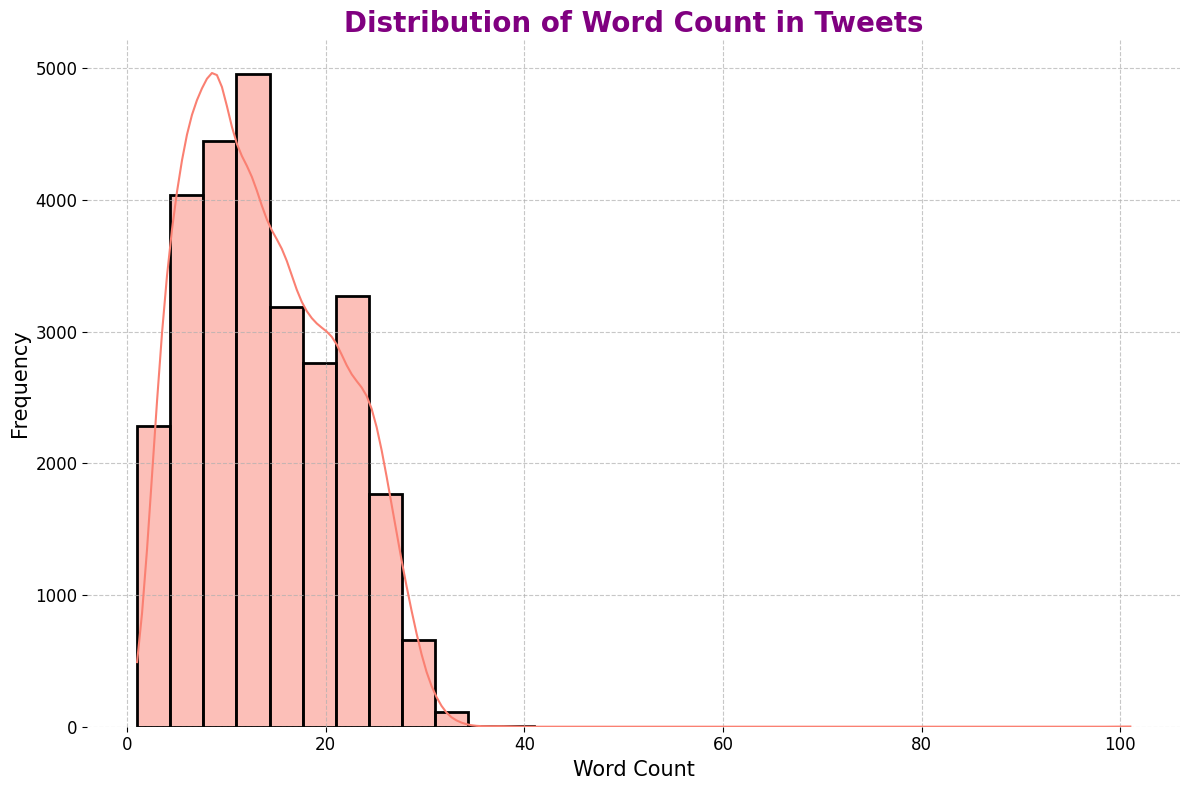

In [17]:
# Plotting Word Count Distribution with Beautiful Styling
plt.figure(figsize=(12, 8))
sns.histplot(df['word_count'], kde=True, color='salmon', bins=30, linewidth=2, edgecolor='black')
plt.title('Distribution of Word Count in Tweets', fontsize=20, fontweight='bold', color='purple')
plt.xlabel('Word Count', fontsize=15, fontweight='light')
plt.ylabel('Frequency', fontsize=15, fontweight='light')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# 12. Stopword Count Distribution 🧹

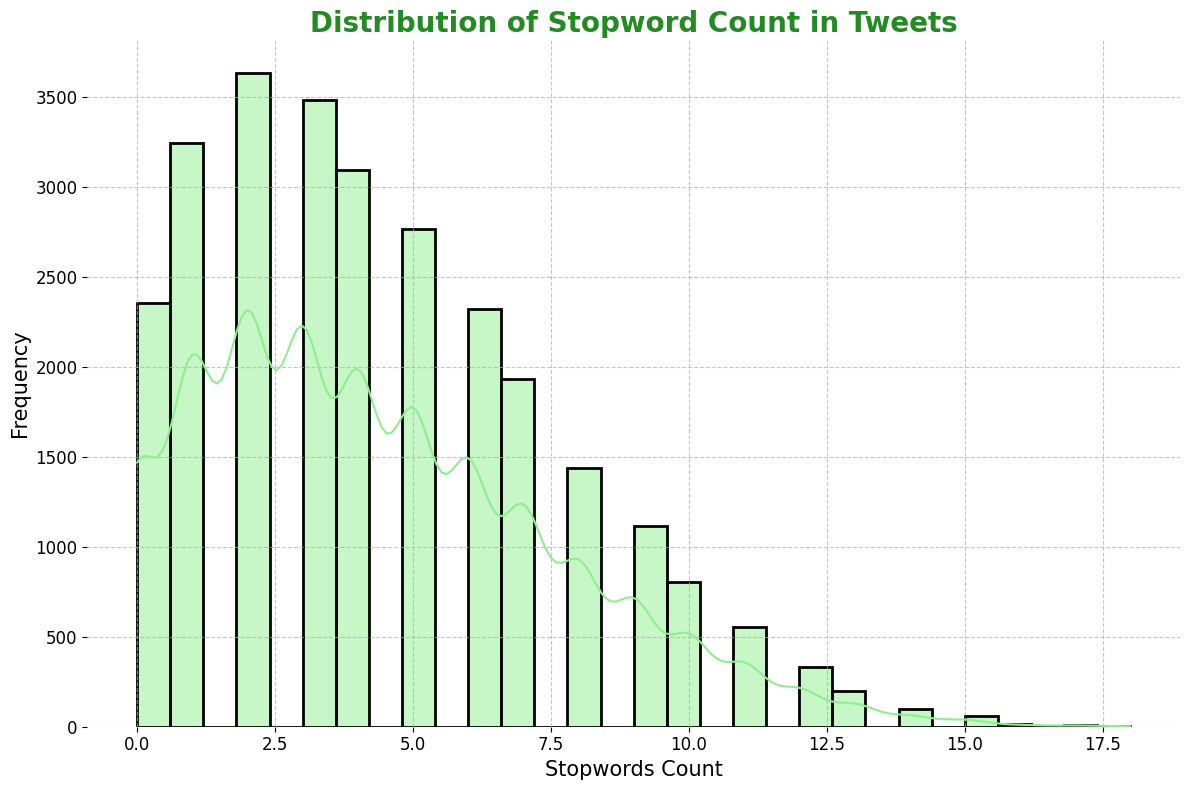

In [18]:
# Plotting Stopword Count Distribution with Enhanced Design
plt.figure(figsize=(12, 8))
sns.histplot(df['stopwords'], kde=True, color='lightgreen', bins=30, linewidth=2, edgecolor='black')
plt.title('Distribution of Stopword Count in Tweets', fontsize=20, fontweight='bold', color='forestgreen')
plt.xlabel('Stopwords Count', fontsize=15, fontweight='light')
plt.ylabel('Frequency', fontsize=15, fontweight='light')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Hashtag Count Distribution 🔖

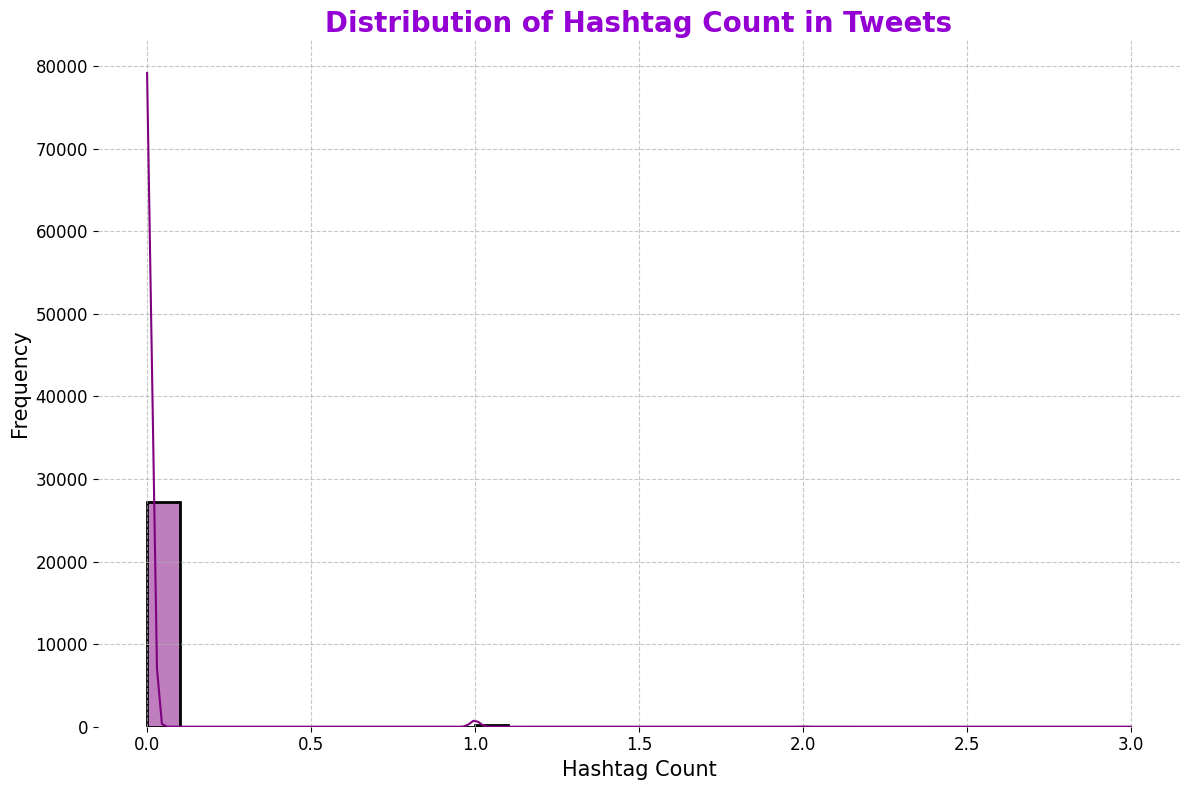

In [19]:
# Plotting Hashtag Count Distribution with Beautiful Styling
plt.figure(figsize=(12, 8))
sns.histplot(df['hastags'], kde=True, color='purple', bins=30, linewidth=2, edgecolor='black')
plt.title('Distribution of Hashtag Count in Tweets', fontsize=20, fontweight='bold', color='darkviolet')
plt.xlabel('Hashtag Count', fontsize=15, fontweight='light')
plt.ylabel('Frequency', fontsize=15, fontweight='light')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Numeric Count Distribution

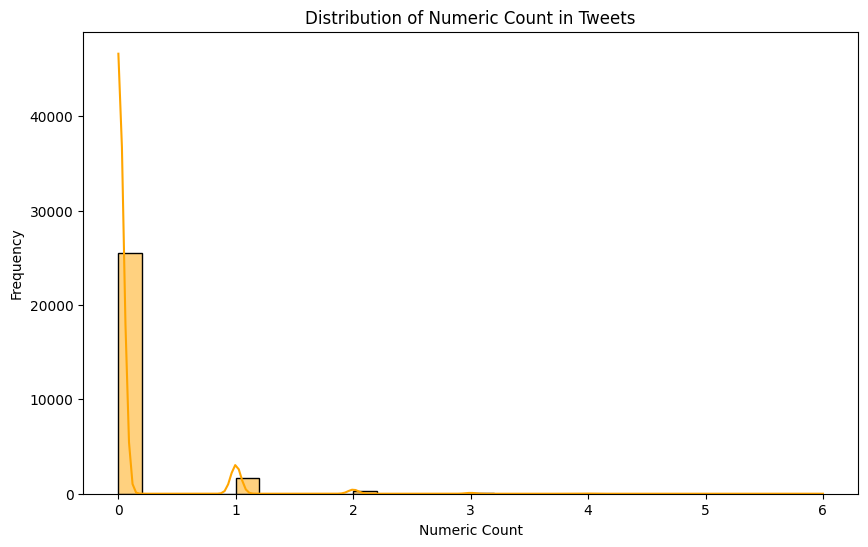

In [20]:
# Plotting Numeric Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['numerics'], kde=True, color='orange', bins=30)
plt.title('Distribution of Numeric Count in Tweets')
plt.xlabel('Numeric Count')
plt.ylabel('Frequency')
plt.show()


# 15. WordCloud for Most Frequent Words

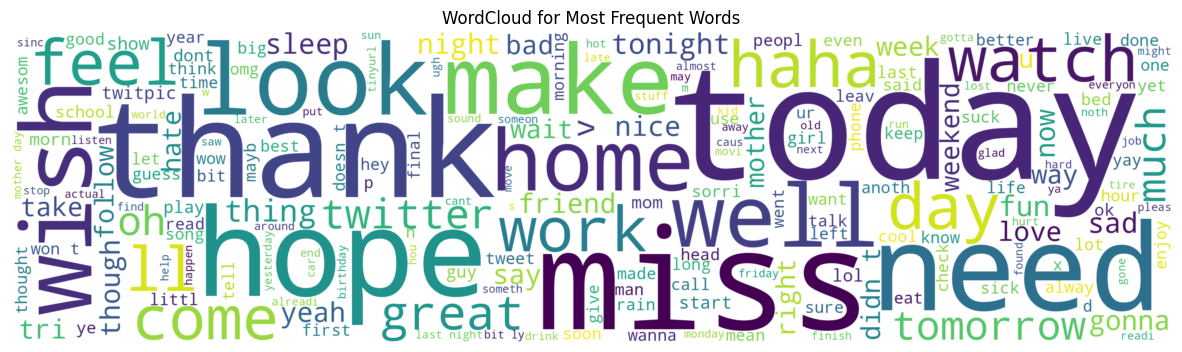

In [21]:
# WordCloud for Most Frequent Words
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=3000, height=800).generate(' '.join(words))

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Most Frequent Words')
plt.axis('off')
plt.show()

# Correlation Between Features

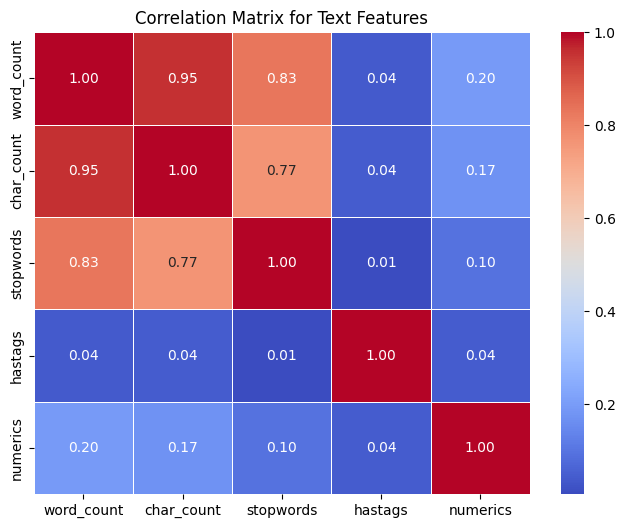

In [22]:
# Correlation Matrix for Numerical Features
correlation_matrix = df[['word_count', 'char_count', 'stopwords', 'hastags', 'numerics']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Text Features')
plt.show()

## 17. Distribution of Sentiments

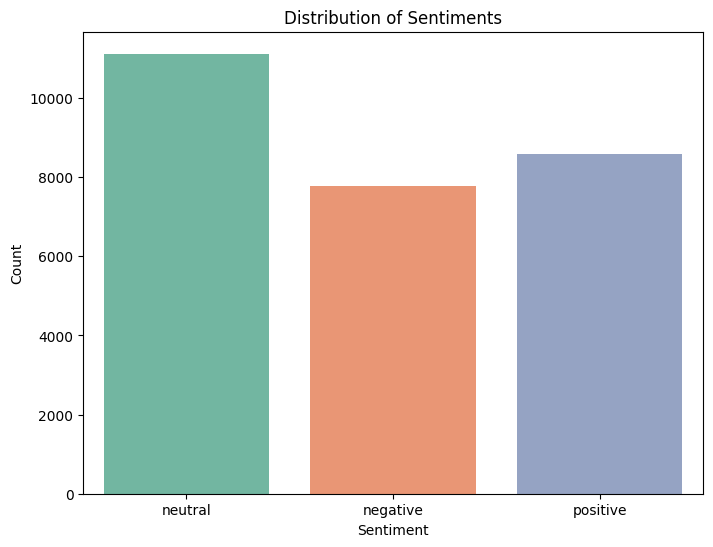

In [23]:
# Plotting Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment Distribution by Length

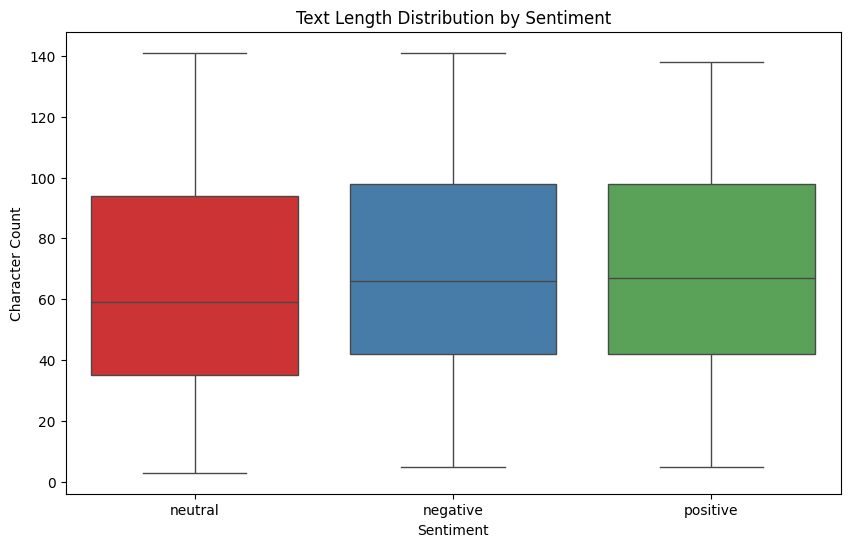

In [24]:
# Sentiment Distribution by Text Length
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='char_count', data=df, palette='Set1')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Character Count')
plt.show()

# Sentiment Distribution by Word Count

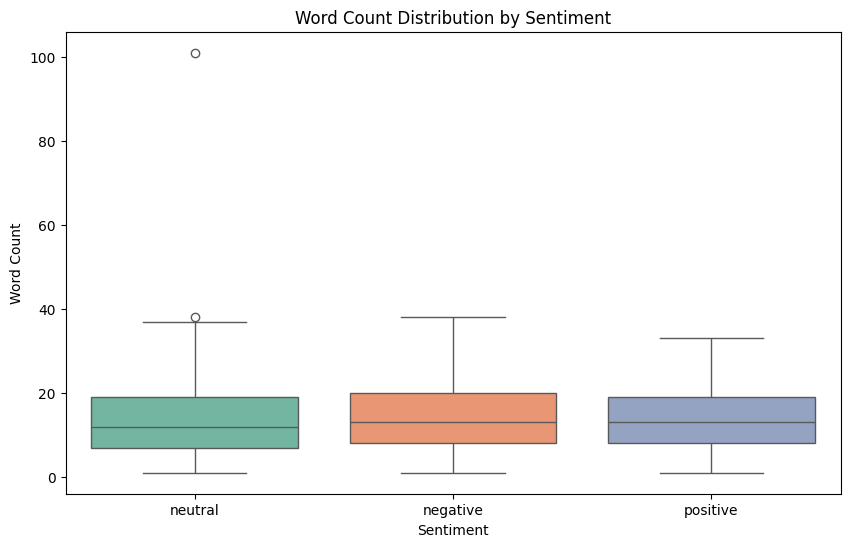

In [25]:
# Sentiment Distribution by Word Count
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='word_count', data=df, palette='Set2')
plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

# TF-IDF Vectorization and Train-Test Split

In [48]:
MAX_VOCAB = 10000
MAX_LEN = 100

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for efficiency
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment']

# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

X_gru = np.array(padded)
y_gru = tf.keras.utils.to_categorical(y, num_classes=3)


In [49]:

# Train-Test Split
X_train_gru, X_test_gru, y_train_gru, y_test_gru = train_test_split(X_gru, y_gru, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train_gru.shape}")
print(f"Test data shape: {X_test_gru.shape}")
print(f"Training data shape: {y_train_gru.shape}")
print(f"Test data shape: {y_test_gru.shape}")

Training data shape: (21984, 100)
Test data shape: (5496, 100)
Training data shape: (21984, 3)
Test data shape: (5496, 3)


In [50]:
##  7. Feature Extraction and Train-Test Split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for efficiency
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment']

# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (21984, 5000)
Test data shape: (5496, 5000)


# Model Evaluation with Advanced Techniques

In [56]:
model_gru = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=64, input_length=MAX_LEN),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: pos, neg, neutral
])

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
print("X_train dtype:", X_train_gru.dtype)
print("X_train shape:", X_train_gru.shape)
print("y_train dtype:", y_train_gru.dtype)
print("y_train shape:", y_train_gru.shape)


X_train dtype: int32
X_train shape: (21984, 100)
y_train dtype: float64
y_train shape: (21984, 3)


In [58]:
history = model_gru.fit(X_train_gru, y_train_gru, epochs=10, batch_size=32,
                    validation_data=(X_test_gru, y_test_gru))


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4026 - loss: 1.0896 - val_accuracy: 0.4068 - val_loss: 1.0869
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4057 - loss: 1.0871 - val_accuracy: 0.4068 - val_loss: 1.0867
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3984 - loss: 1.0893 - val_accuracy: 0.4068 - val_loss: 1.0868
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4101 - loss: 1.0856 - val_accuracy: 0.4068 - val_loss: 1.0871
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4043 - loss: 1.0872 - val_accuracy: 0.4068 - val_loss: 1.0872
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4115 - loss: 1.0850 - val_accuracy: 0.4068 - val_loss: 1.0866
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4010 - loss: 1.0887 - val_accuracy: 0.4068 - val_loss: 1.0866
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4011 - loss: 1.0877 - val_accura

In [59]:
y_pred_gru = model_gru.predict(X_test_gru)
y_pred_classes = np.argmax(y_pred_gru, axis=1)
y_true_gru = np.argmax(y_test_gru, axis=1)

print(classification_report(y_true_gru, y_pred_classes, target_names=label_encoder.classes_))


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1572
     neutral       0.41      1.00      0.58      2236
    positive       0.00      0.00      0.00      1688

    accuracy                           0.41      5496
   macro avg       0.14      0.33      0.19      5496
weighted avg       0.17      0.41      0.24      5496



In [61]:
# Create an empty list to store results
results = []
y_pred_gru_classes = np.argmax(y_pred_gru, axis=1)
y_true_gru_classes = np.argmax(y_test_gru, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true_gru, y_pred_gru_classes)
precision = precision_score(y_true_gru, y_pred_gru_classes, average='weighted')
recall = recall_score(y_true_gru, y_pred_gru_classes, average='weighted')
f1 = f1_score(y_true_gru, y_pred_gru_classes, average='weighted')

# For AUC, use the predicted probabilities and the one-hot encoded ground truth
auc = roc_auc_score(y_test_gru, y_pred_gru, multi_class='ovr')
results.append(['GRU Model', accuracy, precision, recall, f1, auc])


In [ ]:
model.save("gru_sentiment_model.h5")

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


 Training Models:   0%|          | 0/7 [00:00<?, ?it/s]

 Training Model: Logistic Regression


 Training Models:  14%|█▍        | 1/7 [00:50<05:02, 50.40s/it]

 Training Model: Naïve Bayes


 Training Models:  29%|██▊       | 2/7 [00:52<01:49, 21.81s/it]

 Training Model: Random Forest


 Training Models:  43%|████▎     | 3/7 [06:03<10:16, 154.12s/it]

 Training Model: Decision Tree


 Training Models:  57%|█████▋    | 4/7 [12:37<12:26, 248.88s/it]

 Training Model: Gradient Boosting


 Training Models:  71%|███████▏  | 5/7 [32:43<19:47, 593.70s/it]

 Training Model: XGBoost


 Training Models:  86%|████████▌ | 6/7 [34:46<07:13, 433.82s/it]

 Training Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34600
[LightGBM] [Info] Number of data points in the train set: 21984, number of used features: 1161
[LightGBM] [Info] Start training from score -1.264315
[LightGBM] [Info] Start training from score -0.906401
[LightGBM] [Info] Start training from score -1.159663


 Training Models: 100%|██████████| 7/7 [34:53<00:00, 299.10s/it]


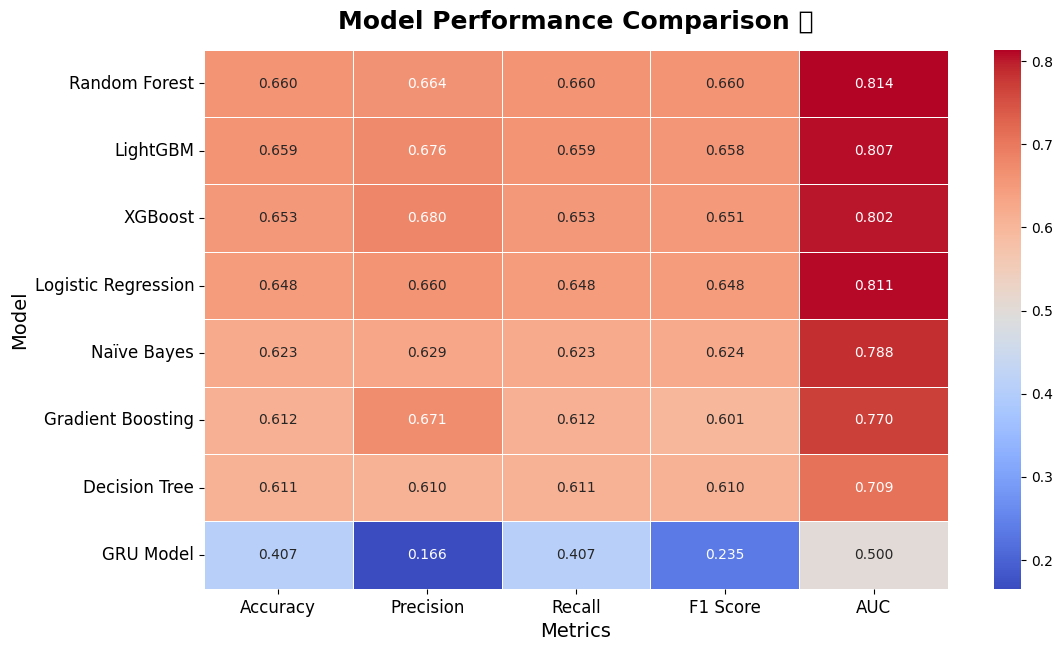

In [62]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from tqdm import tqdm  # For progress tracking
import seaborn as sns
import matplotlib.pyplot as plt


# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naïve Bayes', BernoulliNB()),
    #('Support Vector Classifier', SVC(probability=True)),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')),
    ('LightGBM', lgb.LGBMClassifier())
]



# Loop through models with tqdm progress bar
for model_name, model in tqdm(models, desc=" Training Models"):
    print(f" Training Model: {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    # Append the results to the list
    results.append([model_name, accuracy, precision, recall, f1, auc])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sort the results by Accuracy
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Visualize results in a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(results_df_sorted.set_index('Model'), annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)
plt.title('Model Performance Comparison 📊', fontsize=18, weight='bold', pad=15)
plt.ylabel('Model', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [65]:
import csv
header = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
with open('model_results1.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(results)

In [ ]:
import pickle

# Save the best model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(models[2][1].fit(X_train,y_train), f)

print(" Trained Random Forest model saved!")


# Save vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
print("Vectorizer saved as 'vectorizer.pkl'")

# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print(" Label Encoder saved as 'label_encoder.pkl'")

 Trained Random Forest model saved!
Vectorizer saved as 'vectorizer.pkl'
 Label Encoder saved as 'label_encoder.pkl'


In [ ]:

import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load model
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Basic preprocessor
def preprocess_tweet(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuations and numbers
    text = text.lower().strip()
    return text

# Get user input
tweet = input(" Enter a tweet: ")
preprocessed_tweet = preprocess_tweet(tweet)

# Vectorize
tweet_vector = vectorizer.transform([preprocessed_tweet])

# Predict
prediction = loaded_model.predict(tweet_vector)

# Output
sentiments = ['Negative', 'Neutral', 'Positive']
print(f" Predicted Sentiment: {sentiments[prediction[0]]}")


 Enter a tweet: msdhoni carrer is finished now he should retire he is wasting young talents
 Predicted Sentiment: Neutral


In [ ]:

#Load LabelEnocder for inversing the encoding of target variable
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Function to predict sentiment of custom tweet
def predict_sentiment(tweet_text):
    # Transform tweet using saved vectorizer
    vectorized_tweet = vectorizer.transform([tweet_text]).toarray()

    # Predict sentiment
    prediction_encoded = model.predict(vectorized_tweet)[0]

    # Decode label to original class
    predicted_label = label_encoder.inverse_transform([prediction_encoded])[0]

    return predicted_label

#  Example usage
while True:
    tweet = input("Enter a tweet (or type 'exit' to quit): ")
    if tweet.lower() == 'exit':
        break
    sentiment = predict_sentiment(tweet)
    print(f" Predicted Sentiment: {sentiment}\n")

Enter a tweet (or type 'exit' to quit): virat kohli is too slow for t20 internationals he does not fit in the team 
 Predicted Sentiment: neutral

Enter a tweet (or type 'exit' to quit): exit


In [ ]:

import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load model
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)


#Load LabelEnocder for inversing the encoding of target variable
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Basic preprocessor
def preprocess_tweet(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuations and numbers
    text = text.lower().strip()
    return text


# Function to predict sentiment of custom tweet
def predict_sentiment(tweet_text):
    # Transform tweet using saved vectorizer
    vectorized_tweet = vectorizer.transform([tweet_text]).toarray()

    # Predict sentiment
    prediction_encoded = model.predict(vectorized_tweet)[0]

    # Decode label to original class
    predicted_label = label_encoder.inverse_transform([prediction_encoded])[0]

    return predicted_label

#  Example usage
while True:
    tweet = preprocess_tweet(input("Enter a tweet (or type 'exit' to quit): "))
    if tweet.lower() == 'exit':
        break
    sentiment = predict_sentiment(tweet)
    print(f" Predicted Sentiment: {sentiment}\n")

Enter a tweet (or type 'exit' to quit): i hate ronaldo . i can not understand why he is still playing he is so old now!!
 Predicted Sentiment: neutral

Enter a tweet (or type 'exit' to quit): can you please die
 Predicted Sentiment: negative

Enter a tweet (or type 'exit' to quit): my professor is very lovely i think they will give me full marks
 Predicted Sentiment: neutral

Enter a tweet (or type 'exit' to quit): i love her very much
 Predicted Sentiment: positive

Enter a tweet (or type 'exit' to quit): exit


In [ ]:
import sys
sys.version

'3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]'

In [ ]:
!python --version


Python 3.11.12


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1
